In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-09 / Aki Taanila


# Kategorisen muuttujan lukumääräyhteenveto

Tässä muistiossa käytän **seaborn**-funktioita **countplot** ja **catplot**.

Kaavioiden muotoiluun käytän **matplotlib.pyplot**-funktioita.
Jos kaipaat lisää muotoiluja, niin lue https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tips = sns.load_dataset('tips')    # Esimerkkidata ravintolaseurueiden tipeistä
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Frekvenssijakauma

**countplot** esittää kategorisen muuttujan frekvenssijakauman pylväskaaviona. Jos haluan pystypylväskaavion sijasta vaakapylväskaavion, niin annan muuttujan nimen **x**-parametrin sijasta **y**-parametrina. 

Lisätietoa https://seaborn.pydata.org/generated/seaborn.countplot.html

([<matplotlib.axis.XTick at 0x1aa7d6fad10>,
 [Text(0, 0, 'To'), Text(1, 0, 'Pe'), Text(2, 0, 'La'), Text(3, 0, 'Su')])

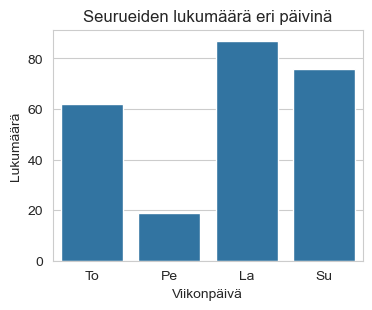

In [3]:
plt.figure(figsize=(4, 3))
sns.countplot(data=tips, x='day')

plt.title('Seurueiden lukumäärä eri päivinä')
plt.xlabel('Viikonpäivä')
plt.ylabel('Lukumäärä')
vkpv = ['To', 'Pe', 'La', 'Su']
plt.xticks([0, 1, 2, 3], vkpv)

**hue**-parametrin avulla voin tarkastella frekvenssijakaumaa toisen kategorisen muuttujan määrittämissä ryhmissä. Seuraavassa käytän muuttujaa **sex** ryhmittelevänä muuttujana.

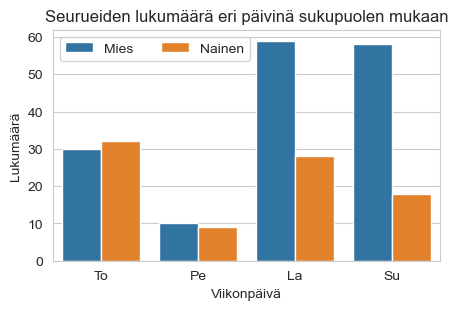

In [4]:
plt.figure(figsize=(5, 3))
sns.countplot(data=tips, x='day', hue='sex')

plt.title('Seurueiden lukumäärä eri päivinä sukupuolen mukaan')
plt.xlabel('Viikonpäivä')
plt.ylabel('Lukumäärä')
plt.xticks([0, 1, 2, 3], vkpv)
plt.legend(['Mies', 'Nainen'], ncol=2)

## Usean muuttujan frekvenssijakaumat samaan kuvioon

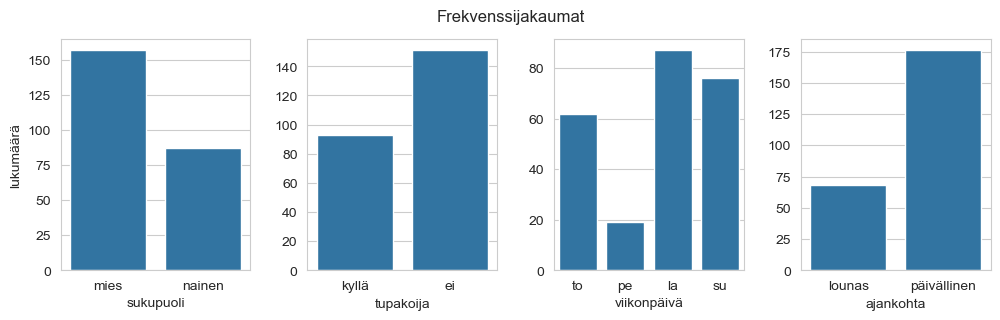

In [5]:
# Lista kategorisista muuttujista
muuttujat = ['sex', 'smoker', 'day', 'time']

# Kuvio, joka sisältää muuttujat-listan määrittämän määrän kaavioita
fig, axs = plt.subplots(nrows=1, ncols=len(muuttujat), figsize=(12, 3))

# Käydään muuttujat-lista läpi, i=järjestysnumero, muuttujar=muuttujan nimi
for i, muuttuja in enumerate(muuttujat):
    sns.countplot(data=tips, x=muuttuja, ax=axs[i])
    axs[i].set_ylabel('')
    

fig.subplots_adjust(wspace=0.3)    # Kaavioiden välinen tyhjä tila

fig.suptitle('Frekvenssijakaumat')

axs[0].set_ylabel('lukumäärä')
axs[0].set_xlabel('sukupuoli')
axs[0].set_xticks([0, 1], ['mies', 'nainen'])

axs[1].set_xlabel('tupakoija')
axs[1].set_xticks([0, 1], ['kyllä', 'ei'])

axs[2].set_xlabel('viikonpäivä')
axs[2].set_xticks([0, 1, 2, 3], ['to', 'pe', 'la', 'su'])

axs[3].set_xlabel('ajankohta')
axs[3].set_xticks([0, 1], ['lounas', 'päivällinen'])

## catplot

**catplot** mahdollistaa kategorisen muuttujan frekvenssijakauman tarkastelun muiden kategoristen muuttujien määrittämissä ryhmissä. **kind**-parametrin arvo **'count'** määrittää että kaaviolajina on **countplot**.

**catplot**in koko määritellään **height**- ja **aspect**-parametreilla.

Seuraavassa tarkastelen lounas- ja päivällisseurueiden (**time**) lukumääriä sukupuolen (**sex**) ja tupakoinnin (**smoker**) määrittämissä ryhmissä.

Lisätietoa https://seaborn.pydata.org/generated/seaborn.catplot.html

**catplot** tuottaa **Facetgrid**-luokan olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun.
Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Text(0.5, 1.0, 'tupakoimaton nainen')

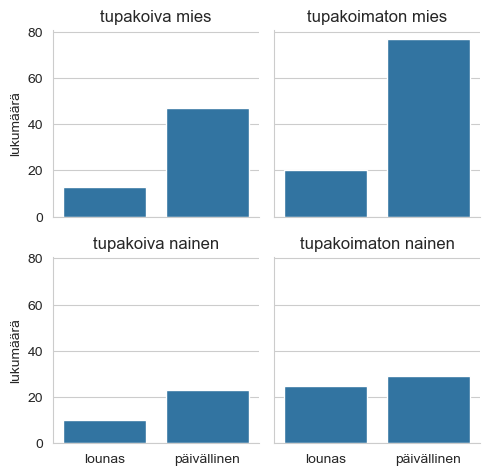

In [6]:
g = sns.catplot(data=tips, x='time', row='sex', col='smoker', kind='count', height=2.5)

g.set_axis_labels('', 'lukumäärä')
g.set_xticklabels(['lounas', 'päivällinen'])

axes = g.axes.flatten()    # Litistetään 2x2 kaaviomatriisin kaaviot listaksi
axes[0].set_title('tupakoiva mies')
axes[1].set_title('tupakoimaton mies')
axes[2].set_title('tupakoiva nainen')
axes[3].set_title('tupakoimaton nainen')